## Linear Regression on Boston Housing Dataset
This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [1]:
## Importing lib
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the Boston Housing DataSet from scikit-learn

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Load the data into pandas dataframe

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


##### The target values is missing from the data. Create a new column of target values and add it to dataframe

In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data preprocessing

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

 Plot the distribution of the target variable MEDV

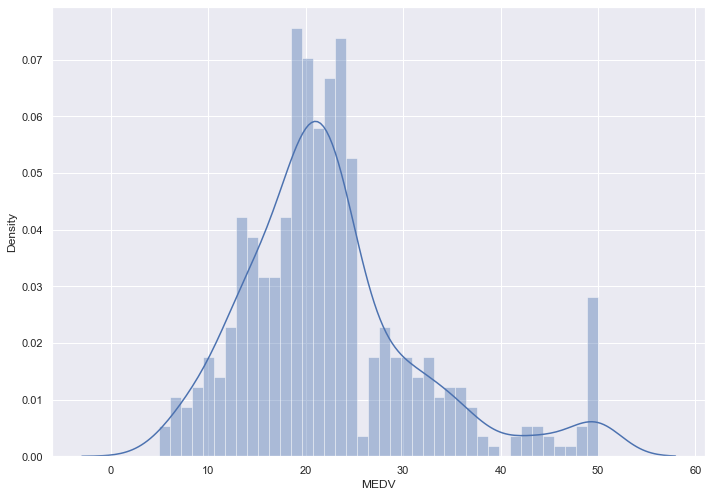

In [7]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=40)
plt.show()
#The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

We see that the values of MEDV are distributed normally with few outliers

#### Create a correlation matrix that measures the linear relationships between the variables

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it
means that there is a strong positive correlation between the two
variables. When it is close to -1, the variables have a strong negative
correlation.

<AxesSubplot:>

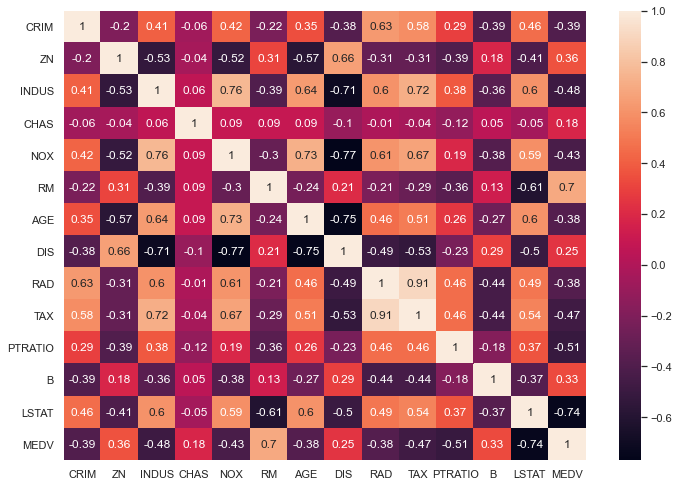

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Observations:
    
To fit a linear regression model, we select those features which have a
high correlation with our target variable MEDV . By looking at the
correlation matrix we can see that RM has a strong positive
correlation with MEDV (0.7) where as LSTAT has a high negative
correlation with MEDV (-0.74).

An important point in selecting features for a linear regression model
is to check for multi-co-linearity. The features RAD , TAX have a
correlation of 0.91. These feature pairs are strongly correlated to
each other. We should not select both these features together for
training the model. Same goes for thefeatures DIS and AGE which have a correlation of -0.75.


#### Observations in a nutshell

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

RAD and TAX are stronly correlated with each other but not so much with MEDV varisble, 
so we don't include this in our features together to avoid multi-colinearity.

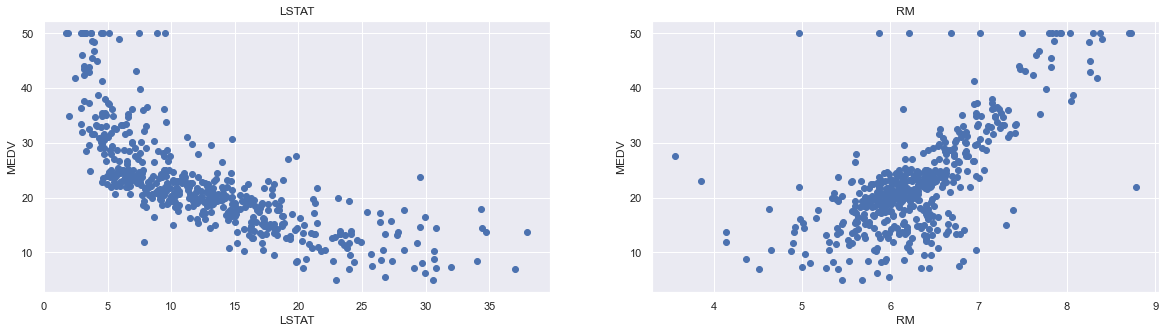

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Observations:
The prices increase as the value of RM increases linearly. There are
few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it
doesn’t look to be following exactly a linear line.


### Preparing the data for training the model


In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
# We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.


## Splitting the data into training and testing sets


We train the modelwith 80% of the samples and test with the remaining 20%. 
We do this to assess the model’s performance on unseen data. To split the data we use
train_test_split function provided by scikit-learn library. We finally print the sizes 
of our training and test set to verify if the splitting has occurred properly.


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [13]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.591337232103148
R2 score is 0.6362692957674003


The model performance for testing set
--------------------------------------
RMSE is 5.267194352277454
R2 score is 0.6412404901688988


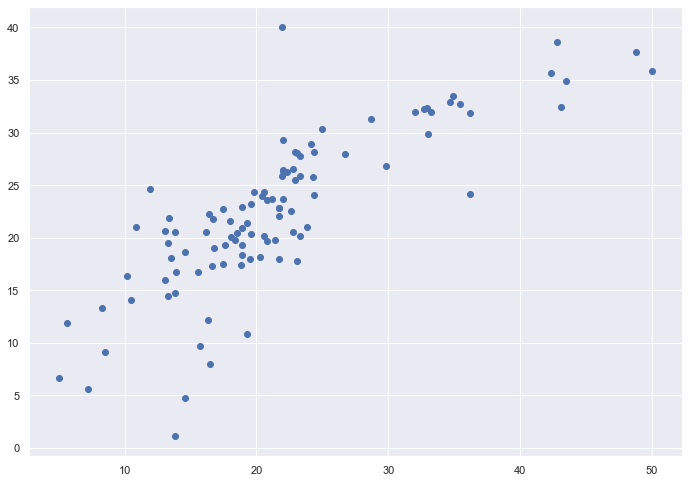

In [14]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## POLYNOMIAL REGRESSION

We can see that LSTAT doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with degree 2 and test.
To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [21]:
create_polynomial_regression_model(4)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.19807437656938
R2 score of training set is 0.7949551588159358


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.384988098439663
R2 score of test set is 0.7513539451727912
